### Method4 [ https://pypi.org/project/rouge-metric/ ]

In [1]:
# Installation

#!python -m pip install matplotlib
#!pip install rouge-metric
#!pip install spicy


In [2]:
import os
import shutil
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import sys
sys.version

'3.6.9 (default, Jan 26 2021, 15:33:00) \n[GCC 8.4.0]'

In [3]:
##installation

#!pip3 install wxconv
#!pip3 install rouge
#!pip3 install rouge-score
#!pip3 install git+https://github.com/tagucci/pythonrouge.git
#!pip3 install rouge-metric [ this is working good ]


In [4]:

### wx converter
#from wxconv import WXC

from rouge_metric import PyRouge ## [ https://pypi.org/project/rouge-metric/ ]



In [5]:

def renaming_files(original_name, new_name):
    src = original_name
    dst = new_name
    try:
        os.rename(src, dst)
    except exception as e:
        print("error: ",e) 

In [6]:

def read_text_file2(text_file):
    lines, tokens = [], []
    ### Reading with UTF-16
    try:
        f = open(text_file, encoding="utf-16", errors='ignore').readlines()
        for line in f:
            line = re.sub(" +"," ",line) ## removing multiple spaces
            line = line.rstrip()
            line = line.lstrip()
            line = line.replace("\t","")
            line = line.replace("\n","")
            line = line.replace("\u200c","")
            line = line.replace("  "," ")
            line = line.strip()
            if(line!="\n" and len(line)>1):
                lines.append(line)
                tokens_list = line.strip().split(" ")
                for tkn in tokens_list:
                    tkn = tkn.rstrip()
                    tkn = tkn.lstrip()
                    tkn = tkn.strip()
                    tokens.append(tkn)
    except Exception as e:
        #print("utf-16 error: ",e)
        pass
        #### reading with UTF-8
        try:
            f = open(text_file,encoding="utf-8", errors='ignore').readlines()
            for line in f:
                line = re.sub(" +"," ",line) ## removing multiple spaces
                line = line.rstrip()
                line = line.lstrip()
                line = line.replace("\t","")
                line = line.replace("\n","")
                line = line.replace("\u200c","")
                line = line.strip()
                if(line!="\n" and len(line)>1):
                    lines.append(line)
                    tokens_list = line.strip().split(" ")
                    for tkn in tokens_list:
                        tkn = tkn.rstrip()
                        tkn = tkn.lstrip()
                        tkn = tkn.strip()
                        tokens.append(tkn)
                        
        except Exception as ee:
            #print("utf-8 error: ",ee)
            pass

    content = " ".join(lines)##whole content
    if(len(lines)==0 or len(tokens)==0):
        print("reading...",text_file,len(lines),len(tokens))

    return content,lines, tokens



In [7]:
## Telugu Tokenizer:


import codecs
import re


from indicnlp.tokenize import sentence_tokenize, indic_tokenize

EndPunctuation = re.compile(r'(రూ|డాక్టర్|ఎ|ఏ|బి|సి|డి|ఇ|ఎఫ్|జి|హెచ్|ఐ|జె|జే|కె|కే|ఎల్|ఎం|ఎమ్|ఎన్|ఒ|ఓ|పి|ఫి|క్యు|క్యూ|ఆర్|ఎస్|టి|తి|యు|ఉ|ఊ|వి|డబ్లు|డబ్లూ|ఎక్స్|ఏక్స్|వై|జెడ్|జేడ్|శ్రీమతి|శ్రి|డాక్టర్|ప్రొఫెసర్|డా|ఛి|చి|చిరంజీవి|సౌ|ల)+\s*')

acronyms = ["రూ","డాక్టర్","ఎ","ఏ","బి","సి","డి","ఇ","ఎఫ్","జి","హెచ్","ఐ","జె","జే","కె","కే","ఎల్","ఎం","ఎమ్","ఎన్","ఒ","ఓ","పి","ఫి","క్యు","క్యూ","ఆర్","ఎస్","టి","తి","యు","ఉ","ఊ","వి","డబ్లు","డబ్లూ","ఎక్స్","ఏక్స్","వై","జెడ్","జేడ్","శ్రీమతి","శ్రి","డాక్టర్","ప్రొఫెసర్","డా","ఛి","చి","చిరంజీవి","సౌ","ల"]
punct = ["<",">","?",".",",","*","'","\\","(",")",":","{","}","—","“","”","‘","’","...","!","-",";","/","[","]","`","~","@","#","$","%","^","&","=","+"]


def preprocess_data(data):
    data = data.replace("\n",". ").replace(":"," ").replace("\t","").replace("\r","").replace('\u200c','')
    data = re.sub(r"\.{2,}"," ",data)
    data = data.replace("!",". ").replace("?"," ")
    data = data.strip()
    return data

def Telugu_tokenizer(textfile):
    data = ""
    filepath = textfile
    #print("filepath : ",filepath)
    ################ Telugu text file reading ###############
    
    ### Reading with UTF-16
    try:
        data = open(filepath, encoding="utf-16", errors='ignore').read()
    except Exception as e:
        #print("utf-16 error: ",e)
        pass
        #### reading with UTF-8
        try:
            data = open(filepath,encoding="utf-8", errors='ignore').read()
        except Exception as ee:
            #print("utf-8 error: ",ee)
            pass

    #print("data:",len(data))
    data = preprocess_data(data)
    #print("data:",len(data))
    
    #data = open(filepath, encoding="utf-16", errors='ignore').read()    
    #data = preprocess_data(data)

    
    #with codecs.open(filepath,"r") as fp:
    #    data = fp.read()

    
    
    ##sentences = sentence_tokenize.sentence_split(data, lang='te')
    words = indic_tokenize.trivial_tokenize_indic(data)
    sentences = []
    tokens = []
    
    begin = 0
    w_begin = 0
    end = 1
    w_end = 1
    
    break_sen = False
    break_wrd = True
    prev = 0
    next_word = ""
    
    for i in range(len(words)):
        if words[i-1]!="." and words[i-1]!=" " and words[i-1]!=",":
            prev = i-1
        else:
            prev = i-2
        

        curr_word = words[i]
        if(prev>=0):
            prev_word = words[prev]
        if curr_word not in punct:
            if i>0 and curr_word not in acronyms:
                w_end = i+1
                break_wrd = True

        if(curr_word=='.' and i>0):
            temp = EndPunctuation.search(prev_word)
            match_word = ""
            if temp is not None:
                match_word = prev_word[temp.span()[0]:temp.span()[1]]
            if prev_word not in acronyms and match_word!=prev_word:
                end = i+1
                break_sen = True
                break_wrd = True
            else:
                if prev_word in tokens:
                    tokens.pop()
                break_wrd = False

        if break_sen:
            sent = " ".join(words[begin:end])
            sent = sent.replace("\n","")
            sent = sent.strip()
            if(sent!=""):
                sentences.append(sent)
            begin = end
            break_sen = False
        if break_wrd:
            if(w_end>len(words)):
                w_end = len(words)
            word = " ".join(words[w_begin:w_end])
            word = re.sub(r",+","",re.sub(r"\.+","",re.sub(r"\-+"," ",word)))
            word = word.strip()
            if word!="":
                tokens.append(word)
            w_begin = w_end
            break_wrd = False
            

    sent = " ".join(words[begin:])
    if((sent!="\n" or sent!="\t" or sent!="" or sent!=" ") and len(sent)>1):
        sentences.append(sent)
    
    content = " ".join(sentences)
    return(content, sentences,tokens)






def telugu_tokenization_calling_function():

    data = ""
    filepath = "article.28613.sent.txt"
    data = open(filepath, encoding="utf-16", errors='ignore').read()    
    data = preprocess_data(data)
    ### Applying tokenization
    sentences, tokens = tokenize_data(data)




In [8]:
## vesrion2 telugu tokenizer:

import codecs
import re
from indicnlp.tokenize import sentence_tokenize, indic_tokenize
#from googletrans import Translator
import nltk
#translator = Translator()
import string
puncts = [char for char in (string.punctuation)]
exclude = ['-','+','/','@']
puncts = [char for char in puncts if char not in exclude]
print(puncts)

EndPunctuation = re.compile(r'(జూ|నం|నెం|రూ|డాక్టర్|ఎ|ఏ|బి|సి|డి|ఇ|ఎఫ్|జి|హెచ్|ఐ|జె|జే|కె|కే|ఎల్|ఎం|ఎమ్|ఎన్|ఒ|ఓ|పి|ఫి|క్యు|క్యూ|ఆర్|ఎస్|టి|తి|యు|ఉ|ఊ|వి|డబ్లు|డబ్లూ|ఎక్స్|ఏక్స్|వై|జెడ్|జేడ్|శ్రీమతి|శ్రి|డాక్టర్|ప్రొఫెసర్|డా|ఛి|చి|చిరంజీవి|సౌ|ల)+\s*')

acronyms = ["జూ","నం","నెం","రూ","డాక్టర్","ఎ","ఏ","బి","సి","డి","ఇ","ఎఫ్","జి","హెచ్","ఐ","జె","జే","కె","కే","ఎల్","ఎం","ఎమ్","ఎన్","ఒ","ఓ","పి","ఫి","క్యు","క్యూ","ఆర్","ఎస్","టి","తి","యు","ఉ","ఊ","వి","డబ్లు","డబ్లూ","ఎక్స్","ఏక్స్","వై","జెడ్","జేడ్","శ్రీమతి","శ్రి","డాక్టర్","ప్రొఫెసర్","డా","ఛి","చి","చిరంజీవి","సౌ","ల"]
punct = ["<",">","?",".",",","*","'","\\","(",")",":","{","}","“","”","‘","’","...","!",";","/","[","]","`","~","@","#","$","%","^","&","=","+"]

def preprocess_data(data):
    data = re.sub(r"\.{2,}\s*",", ",data)
    data = data.replace('\u200c','')
    data = re.sub(r"[!]+",". ",data)
    #data = re.sub(r'["]+',"",data)
    data = re.sub(r'\.+"+','"',data)
    data = re.sub(r"\.+'+","'",data)
    data = re.sub(r'\.+\s*-+',', ',data)
    '''
    print("preprocess data: ",data, len(data))
    temp = re.split("\n",data)
    for i in range(len(temp)):
        if(len(temp[i])>0):
            temp[i] = temp[i].strip()
            if(temp[i][-1]=='"'):
                temp[i]+=" "
            elif(temp[i][-1] not in punct):
                temp[i]+=". "
            else:
                temp[i]+=" "
            
    data = "".join(temp)
    '''
    data = re.sub(r"[:\?\t]+"," ",data)
    data = re.sub(r"[\n]+","\n",data)
    data = re.sub(r"[\r]+","\r",data)
    data = data.strip()
    return data

def sentence_tokenize(data):
    words = indic_tokenize.trivial_tokenize_indic(data)
    sentences = []
    begin = 0
    end = 1
    break_sen = False
    prev = 0
    next_word = ""

    for i in range(len(words)):
        if words[i-1]!="." and words[i-1]!=" " and words[i-1]!=",":
            prev = i-1
        else:
            prev = i-2

        curr_word = words[i]
        if(prev>=0):
            prev_word = words[prev]

        if((curr_word=='.' or curr_word=="\n" or curr_word=="\r") and i>0):
            temp = EndPunctuation.search(prev_word)
            match_word = ""
            if temp is not None:
                match_word = prev_word[temp.span()[0]:temp.span()[1]]
            if prev_word not in acronyms and match_word!=prev_word:
                end = i+1
                break_sen = True

        if break_sen:
            sent = " ".join(words[begin:end])
            sent = sent.replace("\n","")
            sent = sent.strip()
            if(sent!="" and sent!="." and sent!="\n" and sent!="\r"):
                sentences.append(sent)
            begin = end
            break_sen = False

    sent = " ".join(words[begin:])
    if(len(sent)>1 and (sent!="\n" and sent!="\t" and sent!="" and sent!=" ")):
        sentences.append(sent)

    return sentences

def word_tokenize(sent_list):
    tokens = []
    break_wrd = True
    prev = 0
    next_word = ""
    
    for i in range(len(sent_list)):
        w_begin = 0
        w_end = 1
        tok_list = []
        sent = sent_list[i]
        sent = re.sub(r",\s*",", ",sent)
        prev = -1
        #print(sent)
        words = indic_tokenize.trivial_tokenize_indic(sent)
        break_wrd = True
        #print(words)

        for i in range(len(words)):
            if i>0 and words[i-1]!="." and words[i-1]!=" " and words[i-1]!=",":
                prev = i-1
            else:
                prev = i-2
            

            curr_word = words[i]
            prev_word = ""
            if(prev>=0):
                prev_word = words[prev]
            if curr_word not in punct and curr_word!="-":
                if i>0 and curr_word not in acronyms:
                    w_end = i+1
                    break_wrd = True

            elif curr_word=="-" and i>0:
                if prev_word in tok_list:
                    w_begin -= 1
                    tok_list.pop()
                break_wrd = False
                
            if break_wrd:
                if(w_end>len(words)):
                    w_end = len(words)
                word = " ".join(words[w_begin:w_end])
                word = re.sub(r"["+"".join(puncts)+"]+","",word)
                #word = re.sub(r",+","",re.sub(r"(\.\s*)+","",re.sub(r"\-+"," ",word)))
                word = word.strip()
                if word!="":
                    tok_list.append(word)
                w_begin = w_end
                break_wrd = False
        tokens.append(tok_list)
        
    return tokens




def Telugu_tokenizer_method2(filepath):
    data = ""
    
    #with codecs.open("article.15506.sent.txt","r",encoding="utf-8") as fp:
    #with codecs.open(filename,"r",encoding="utf-8") as fp:
    #    data = fp.read()

    ################ Telugu text file reading ###############
    
    ### Reading with UTF-16
    try:
        data = open(filepath, encoding="utf-16", errors='ignore').read()
    except Exception as e:
        #print("utf-16 error: ",e)
        pass
        #### reading with UTF-8
        try:
            data = open(filepath,encoding="utf-8", errors='ignore').read()
        except Exception as ee:
            #print("utf-8 error: ",ee)
            pass

        

    #print("data:", len(data), filepath)
    data = preprocess_data(data)
    #print_data(data)
    sentences = sentence_tokenize(data)
    tokens = word_tokenize(sentences)
    content = " ".join(sentences)

    import itertools
    all_tokens = list(itertools.chain(*tokens))
    return content, sentences, all_tokens

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '.', ':', ';', '<', '=', '>', '?', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [9]:
################################################## percentage wise division ########################################

def percentage(part, whole):
    return 100 * float(part)/float(whole) ### ((summary_len*100)/article_len)


def length_ratio_division_percentages(sample_num, tokens_article, tokens_summary):
    summary_len_perc = percentage(len(tokens_summary),len(tokens_article))
    for i in range(10):
        if(summary_len_perc<=percentage_ranges[i]):
            length_tokens_wise_percentage[i]=length_tokens_wise_percentage[i]+1 ### storing the count of samples;
            length_tokens_wise_percentage_dict[i]['count'] = length_tokens_wise_percentage_dict[i]['count']+1
            length_tokens_wise_percentage_dict[i]['samples'].append(sample_num)
            break


def sentwise_length_ratio_division_percentages(sample_num, sent_article, sent_summary):
    summary_len_perc = percentage(len(sent_summary),len(sent_article))
    for i in range(10):
        if(summary_len_perc<=percentage_ranges[i]):
            length_sents_wise_percentage[i]=length_sents_wise_percentage[i]+1 ### storing the count of samples;
            length_sents_wise_percentage_dict[i]['count'] = length_sents_wise_percentage_dict[i]['count']+1
            length_sents_wise_percentage_dict[i]['samples'].append(sample_num)
            break



In [10]:
def categorizing_rouge_score_values(sample_num, r1, r2, r3, r4, rl, p1, p2, p3, p4, pl, n1, n2, n3, n4, nl):
    
    ###################### Copying w.r.t to Article [Recall Based] ###############################
    summary_copying_perc = r1
    for i in range(10):
        if(summary_copying_perc<=percentage_ranges[i]):
            copy1[i]=copy1[i]+1 ### storing the count of samples;
            copy1_dict[i]['count'] = copy1_dict[i]['count']+1
            copy1_dict[i]['samples'].append(sample_num)
            break
            
    summary_copying_perc = r2
    for j in range(10):
        if(summary_copying_perc<=percentage_ranges[j]):
            copy2[j]=copy2[j]+1 
            copy2_dict[j]['count'] = copy2_dict[j]['count']+1
            copy2_dict[j]['samples'].append(sample_num)

            break
            
    summary_copying_perc = r3
    for k in range(10):
        if(summary_copying_perc<=percentage_ranges[k]):
            copy3[k]=copy3[k]+1 
            copy3_dict[k]['count'] = copy3_dict[k]['count']+1
            copy3_dict[k]['samples'].append(sample_num)
            break
            
    summary_copying_perc = r4
    for l in range(10):
        if(summary_copying_perc<=percentage_ranges[l]):
            copy4[l]=copy4[l]+1
            copy4_dict[l]['count'] = copy4_dict[l]['count']+1
            copy4_dict[l]['samples'].append(sample_num)            
            break
            
    summary_copying_perc = rl
    for u in range(10):
        if(summary_copying_perc<=percentage_ranges[u]):
            copy5[u]=copy5[u]+1 
            copy5_dict[u]['count'] = copy5_dict[u]['count']+1
            copy5_dict[u]['samples'].append(sample_num)
            break
            
    ###################### Copying w.r.t to Summary [Precision Based] ###############################
    summary_copying_perc = p1 
    for a in range(10):
        if(summary_copying_perc<=percentage_ranges[a]):
            precision_copy1[a]=precision_copy1[a]+1 ### storing the count of samples;
            precision_copy1_dict[a]['count'] = precision_copy1_dict[a]['count']+1
            precision_copy1_dict[a]['samples'].append(sample_num)
            break
            
    summary_copying_perc = p2 
    for j in range(10):
        if(summary_copying_perc<=percentage_ranges[j]):
            precision_copy2[j]=precision_copy2[j]+1 
            precision_copy2_dict[j]['count'] = precision_copy2_dict[j]['count']+1
            precision_copy2_dict[j]['samples'].append(sample_num)
            break
            
    summary_copying_perc = p3 
    for k in range(10):
        if(summary_copying_perc<=percentage_ranges[k]):
            precision_copy3[k]=precision_copy3[k]+1 
            precision_copy3_dict[k]['count'] = precision_copy3_dict[k]['count']+1
            precision_copy3_dict[k]['samples'].append(sample_num)
            break
            

    summary_copying_perc = p4
    for l in range(10):
        if(summary_copying_perc<=percentage_ranges[l]):
            precision_copy4[l]=precision_copy4[l]+1 
            precision_copy4_dict[l]['count'] = precision_copy4_dict[l]['count']+1
            precision_copy4_dict[l]['samples'].append(sample_num)
            break


    summary_copying_perc = pl
    for u in range(10):
        if(summary_copying_perc<=percentage_ranges[u]):
            precision_copy5[u]=precision_copy5[u]+1 
            precision_copy5_dict[u]['count'] = precision_copy5_dict[u]['count']+1
            precision_copy5_dict[u]['samples'].append(sample_num)
            break


    ############################## Novelity [1-precision] ##############################
    summary_novelity_perc = n1
    for p in range(10):
        if(summary_novelity_perc<=percentage_ranges[p]):
            novelity1[p]=novelity1[p]+1 ### storing the count of samples;
            novelity1_dict[p]['count'] = novelity1_dict[p]['count']+1
            novelity1_dict[p]['samples'].append(sample_num)
            break
            
    summary_novelity_perc = n2
    for q in range(10):
        if(summary_novelity_perc<=percentage_ranges[q]):
            novelity2[q]=novelity2[q]+1 
            novelity2_dict[q]['count'] = novelity2_dict[q]['count']+1
            novelity2_dict[q]['samples'].append(sample_num)
            break
            
    summary_novelity_perc = n3
    for s in range(10):
        if(summary_novelity_perc<=percentage_ranges[s]):
            novelity3[s]=novelity3[s]+1
            novelity3_dict[s]['count'] = novelity3_dict[s]['count']+1
            novelity3_dict[s]['samples'].append(sample_num)
            break
            
    summary_novelity_perc = n4
    for x in range(10):
        if(summary_novelity_perc<=percentage_ranges[x]):
            novelity4[x]=novelity4[x]+1 
            novelity4_dict[x]['count'] = novelity4_dict[x]['count']+1
            novelity4_dict[x]['samples'].append(sample_num)
            break

    summary_novelity_perc = nl
    for y in range(10):
        if(summary_novelity_perc<=percentage_ranges[y]):
            novelity5[y]=novelity5[y]+1 
            novelity5_dict[y]['count'] = novelity5_dict[y]['count']+1
            novelity5_dict[y]['samples'].append(sample_num)
            break



In [11]:
def rouge_score_division_percentage_method4(sample_num, content_article, content_summary):   
    ## rouge_metric:
    hypotheses = [content_summary] #["మంచం క్రింద పిల్లి కనుగొనబడింది"]
    references = [[content_article]] #[["పిల్లి మంచం క్రింద ఉంది"]]

    # Evaluate document-wise ROUGE scores
    rouge = PyRouge(rouge_n=(1, 2, 3, 4, 5), rouge_l=True, rouge_w=True, rouge_w_weight=1.2, rouge_s=True, rouge_su=True, skip_gap=4)
    scores = rouge.evaluate(hypotheses, references)
    #print(scores)
    #print("\n")
    
    f1 = scores['rouge-1']['f']*100
    f2 = scores['rouge-2']['f']*100
    f3 = scores['rouge-3']['f']*100
    f4 = scores['rouge-4']['f']*100
    f5 = scores['rouge-5']['f']*100
    fl = scores['rouge-l']['f']*100

    p1 = scores['rouge-1']['p']*100
    p2 = scores['rouge-2']['p']*100
    p3 = scores['rouge-3']['p']*100
    p4 = scores['rouge-4']['p']*100
    p5 = scores['rouge-5']['p']*100
    pl = scores['rouge-l']['p']*100
    
    r1 = scores['rouge-1']['r']*100
    r2 = scores['rouge-2']['r']*100
    r3 = scores['rouge-3']['r']*100
    r4 = scores['rouge-4']['r']*100
    r5 = scores['rouge-5']['r']*100
    rl = scores['rouge-l']['r']*100
    
    n1 = 100.0-(p1)
    n2 = 100.0-(p2)
    n3 = 100.0-(p3)
    n4 = 100.0-(p4)
    n5 = 100.0-(p5)
    nl = 100.0-(pl)
 

    #### Filtering process using Bigram ########
    ## we'll consider the samples if it summaries contains n2 > 30% novelty;
    
    #if(n2>30 and r2<70):
    #if(n2>20):
        #filtering_samples.append(sample_num)
    categorizing_rouge_score_values(sample_num , r1, r2, r3, r4, rl, p1, p2, p3, p4, pl, n1, n2, n3, n4, nl)
    
    
    #### Storing rouge scores into a dictionary #####
    samples_ngrams_scores[sample_num] = {
        
               'novelty': {'rouge-1':n1, 'rouge-2':n2,  'rouge-3':n3,  'rouge-4':n4,  'rouge-5':n5 , 'rouge-L':nl},
        
        'copy_precision': {'rouge-1':p1, 'rouge-2':p2,  'rouge-3':p3,  'rouge-4':p4,  'rouge-5':p5 , 'rouge-L':pl},
        
           'copy_recall': {'rouge-1':r1, 'rouge-2':r2,  'rouge-3':r3,  'rouge-4':r4,  'rouge-5':r5,  'rouge-L':rl},
        
            '  f1_score': {'rouge-1':f1, 'rouge-2':f2,  'rouge-3':f3,  'rouge-4':f4,  'rouge-5':f5,  'rouge-L':fl}

    }
    
    


In [12]:
### Initialization

count = 0 ## total corpus
good_samples_count = 0 ## filtering on corpus
blank_count = 0
miss = 0
m = 0

############################### Samples length in terms of tokens, sentences:
article_tokens = []
article_sents  = []

summary_tokens = []
summary_sents  = []

################################ Rouge scores:
samples_ngrams_scores = {}


############################## Length:

length_tokens_wise_percentage_dict = {i:{'count':0, 'samples':[]} for i in range(10)} #{i:0 for i in range(10)}
length_sents_wise_percentage_dict = {i:{'count':0, 'samples':[]} for i in range(10)}

length_tokens_wise_percentage = [0]*10
length_sents_wise_percentage   = [0]*10



############################# Recall based:
copy1 = [0]*10 ##rouge-1
copy2 = [0]*10 ##rouge-2
copy3 = [0]*10 ##rogue-3
copy4 = [0]*10 ##rouge-4
copy5 = [0]*10 ##rouge-l


copy1_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
copy2_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
copy3_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
copy4_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
copy5_dict = {i:{'count':0, 'samples':[]} for i in range(10)}


################################################ Precision based:
precision_copy1 = [0]*10 ##rouge-1
precision_copy2 = [0]*10 ##rouge-2
precision_copy3 = [0]*10 ##rogue-3
precision_copy4 = [0]*10 ##rouge-4
precision_copy5 = [0]*10 ##rouge-l


precision_copy1_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
precision_copy2_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
precision_copy3_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
precision_copy4_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
precision_copy5_dict = {i:{'count':0, 'samples':[]} for i in range(10)}


######################################[1-precision]=novelity:
novelity1 = [0]*10 ##rogue-1
novelity2 = [0]*10 ##rouge-2
novelity3 = [0]*10 ##rouge-3
novelity4 = [0]*10 ##rouge-4
novelity5 = [0]*10 ##rogue-l


novelity1_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
novelity2_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
novelity3_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
novelity4_dict = {i:{'count':0, 'samples':[]} for i in range(10)}
novelity5_dict = {i:{'count':0, 'samples':[]} for i in range(10)}


###################### vocab, dataset, paraphrased samples:

percentage_ranges = [10,20,30,40,50,60,70,80,90,100]
dataset = {} ## good samples;
dataset_paraphrased_articles = {} ##fully copied or sentence wise mostly novelity;


articles_vocab = {}
summaries_vocab = {}
whole_vocab = {} ## articles  & summaries;
articles_lemmas_vocab = []
summaries_lemmas_vocab = []



###################################Data paths:

#main_path = "/home/priyanka/Documents/Corpus_statistics/step1/"
#main_path = "/home/priyanka/Desktop/Summarization/Corpus_statistics/step1/"
main_path = "/home/priyanka/Desktop/28_12_2020_works/Preprocessing_data/step1/"
#main_path = "/home/priyanka/Desktop/28_12_2020_works/version2/"

sub_directories = ["train","dev"]## whole data: train = train+test1; dev = dev; test2 is ignoring now;
#sub_directories = ["data_m1_test_Version2"]


fname = open("corpus_details.txt","w")

In [13]:
############# Sample wise quality checking ##########

for sub_dir in sub_directories:
    print("set name: ",sub_dir)
    full_path = os.path.join(main_path, sub_dir)
    list_samples = sorted(os.listdir(full_path))
    print("list_samples:",len(list_samples))
    for sample_dir in list_samples:
        #print("sample_dir, count : ",sample_dir, count)
        sample_full_path = os.path.join(full_path,sample_dir)
        txt_files = sorted(os.listdir(sample_full_path))
        txt_files = [txt__file for txt__file in txt_files if txt__file.endswith('.txt')]
        
        
        #for txt in txt_files:
        infile = "article."+str(sample_dir)+".sent.txt"
        outfile = "article."+str(sample_dir)+".summ.sent.txt"
        
        '''
        #for txt in txt_files: [version2 data files]
        infile = "article."+str(sample_dir)+".sent.test_v2.txt"
        outfile = "article."+str(sample_dir)+".summ.sent.test_v2.txt"
        '''
        
        
        if(infile in txt_files and outfile in txt_files):
            count+=1
            #print(os.path.join(sample_full_path,infile))
            
            infile_content, infile_sents, infile_tokens = Telugu_tokenizer_method2(os.path.join(sample_full_path,infile))
            outfile_content, outfile_sents, outfile_tokens = Telugu_tokenizer_method2(os.path.join(sample_full_path,outfile))
            
            #infile_content, infile_sents, infile_tokens = read_text_file2(os.path.join(sample_full_path,infile))
            #outfile_content, outfile_sents, outfile_tokens = read_text_file2(os.path.join(sample_full_path,outfile))
            #print("sample_dir = %s, count=%d , article_sents_count = %d, summary_sents_count=%d: "%(sample_dir, count, len(infile_sents), len(outfile_sents)))

            fname.write("sample_dir = %s, count=%d , article_sents_count = %d, summary_sents_count=%d: "%(sample_dir, count, len(infile_sents), len(outfile_sents)))
            fname.write("\n")

            
            ### some condition to ignore some kind of samples:
            if(len(infile_sents)<4 or len(infile_sents)>15): ##ignoring these samples;
                continue
 
            
            if(len(infile_content)==0 or len(outfile_content)==0):
                print("blank: ",sample_dir)
                blank_count+=1
                
                
            if(len(infile_tokens)<=len(outfile_tokens)):
                #print("summary content is more : ",sample_dir)
                m+=1
                
                dataset_paraphrased_articles[sample_dir]= {
                
                'article':{'content':infile_content, 'sentences_wise':infile_sents, 'tokens_wise':infile_tokens},
                'summary':{'content':outfile_content, 'sentences_wise':outfile_sents, 'tokens_wise':outfile_tokens}
                }
                

            if(len(infile_content)==0 or len(outfile_content)==0 or (len(infile_tokens)<=len(outfile_tokens))):
                pass
            else:
                good_samples_count+=1
                
                ####### tokens and sentences wise stats ########
                article_tokens.append(len(infile_tokens))
                article_sents.append(len(infile_sents))

                summary_tokens.append(len(outfile_tokens))
                summary_sents.append(len(outfile_sents))

                
                ############ Storing dataset ###############
                dataset[sample_dir] = {
                'article':{'content':infile_content, 'sentences_wise':infile_sents, 'tokens_wise':infile_tokens},
                'summary':{'content':outfile_content, 'sentences_wise':outfile_sents, 'tokens_wise':outfile_tokens}
                }
                
                #################### Vocab ###############
                ### articles:
                for w in infile_tokens:
                    if w in articles_vocab.keys():
                        articles_vocab[w] += 1
                    else:
                        articles_vocab[w] = 1
                    
                ## summaries:
                for w in outfile_tokens:
                    if w in summaries_vocab.keys():
                        summaries_vocab[w] += 1
                    else:
                        summaries_vocab[w] = 1
                            
    
                #################### length #################
                length_ratio_division_percentages(sample_dir, infile_tokens,outfile_tokens)### Tokens wise
                sentwise_length_ratio_division_percentages(sample_dir, infile_sents,outfile_sents)### Sentence wise

                ################## Rouge method ################
                rouge_score_division_percentage_method4(sample_dir, infile_content, outfile_content)
        else:
            print(infile, outfile)
            miss+=1   
           
        
print("\n")


set name:  train
list_samples: 27039
set name:  dev
list_samples: 3336




In [14]:
############################## cross-checking:
import json
#length_tokens_wise_percentage_dict = {i:{'count':0, 'samples':[]} for i in range(10)} ## formate

def checking_all_values(list_values, dictionary_values):
    total_sum = 0
    for i in range(10):
        if not(list_values[i]==dictionary_values[i]['count']==len(dictionary_values[i]['samples'])):
            print("not matching...")
            print(list_values[i],dictionary_values[i]['count'],len(dictionary_values[i]['samples']))
        else:
            total_sum+=len(dictionary_values[i]['samples'])
    print(sum(list_values), total_sum)
    print("\n")

    

print("Tokens:")
checking_all_values(length_tokens_wise_percentage, length_tokens_wise_percentage_dict)
print("Sentences:")
checking_all_values(length_sents_wise_percentage, length_sents_wise_percentage_dict)


print("novelty1")
checking_all_values(novelity1, novelity1_dict)
print("novelty2")
checking_all_values(novelity2, novelity2_dict)
print("novelty3")
checking_all_values(novelity3, novelity3_dict)
print("novelty4")
checking_all_values(novelity4, novelity4_dict)
print("novelty5")
checking_all_values(novelity5, novelity5_dict)


print("copy1")
checking_all_values(copy1, copy1_dict)
print("copy2")
checking_all_values(copy2, copy2_dict)
print("copy3")
checking_all_values(copy3, copy3_dict)
print("copy4")
checking_all_values(copy4, copy4_dict)
print("copy5")
checking_all_values(copy5, copy5_dict)


print("precision_copy1")
checking_all_values(precision_copy1, precision_copy1_dict)
print("precision_copy2")
checking_all_values(precision_copy2, precision_copy2_dict)
print("precision_copy3")
checking_all_values(precision_copy3, precision_copy3_dict)
print("precision_copy4")
checking_all_values(precision_copy4, precision_copy4_dict)
print("precision_copy5")
checking_all_values(precision_copy5, precision_copy5_dict)


############# saving all these categorized information:

########formate:
categorized_data_information = {
    
    ### Rouge score based info
    'novelty':{'novelty_rouge_1':novelity1_dict,'novelty_rouge_2':novelity2_dict,
               'novelty_rouge_3':novelity3_dict,'novelty_rouge_4':novelity4_dict,
               'novelty_rouge_L': novelity5_dict
              },
    
    
    'copy_precision':{
        'precision_copy_rouge_1':precision_copy1_dict,'precision_copy_rouge_2':precision_copy2_dict,
                          
        'precision_copy_rouge_3':precision_copy3_dict,'precision_copy_rouge_4':precision_copy4_dict,
        'precision_copy_rouge_L':precision_copy5_dict
                },
    
    
    'copy_recall': {
        'recall_copy_rouge_1':copy1_dict,'recall_copy_rouge_2':copy2_dict,
        'recall_copy_rouge_3':copy3_dict,'recall_copy_rouge_4':copy4_dict, 
        'recall_copy_rouge_L':copy5_dict
            },
    
    ### Length based info
    'sentences_wise': {
        'sents_bins': length_sents_wise_percentage_dict
                    },
    
    'tokens_wise':{
        'tokens_bins': length_tokens_wise_percentage_dict
                    }
       

}





Tokens:
26924 26924


Sentences:
26912 26912


novelty1
26924 26924


novelty2
26924 26924


novelty3
26924 26924


novelty4
26924 26924


novelty5
26924 26924


copy1
26924 26924


copy2
26924 26924


copy3
26924 26924


copy4
26924 26924


copy5
26924 26924


precision_copy1
26924 26924


precision_copy2
26924 26924


precision_copy3
26924 26924


precision_copy4
26924 26924


precision_copy5
26924 26924




In [15]:
#### saving the resulsts
import json
import pickle


################## All samples rouge scores ##################

with open('rouge_scores.json', 'w') as fp: #Json formate
    json.dump(samples_ngrams_scores, fp)
    

###################### Dataset ###########################

with open('dataset.json', 'w') as fp: #json formate
    json.dump(dataset, fp)


#################### Length ####################

with open('length_tokens_wise_percentage.json', 'w') as fp:
    json.dump(length_tokens_wise_percentage, fp)

    
with open('length_sents_wise_percentage.json', 'w') as fp:
    json.dump(length_sents_wise_percentage, fp)


################### Paraphrased articles ##################

## json formate
with open('dataset_paraphrased_articles.json', 'w') as fp:
    json.dump(dataset_paraphrased_articles, fp)

    
with open('rouge_score_based_categorized_data_information.json', 'w') as fp: #json formate
    json.dump(categorized_data_information, fp)


In [16]:


############# Tokens ################
import numpy as np

max_article_tokens = max(article_tokens)
min_article_tokens = min(article_tokens)
mean_article_tokens = np.mean(np.array(article_tokens))
avg_article_tokens = sum(article_tokens)/len(article_tokens)


max_summary_tokens = max(summary_tokens)
min_summary_tokens = min(summary_tokens)
mean_summary_tokens = np.mean(np.array(summary_tokens))
avg_summary_tokens = sum(summary_tokens)/len(summary_tokens)


##################### Sentences #################
max_article_sents = max(article_sents)
min_article_sents = min(article_sents)
avg_article_sents = sum(article_sents)/len(article_sents)
mean_article_sents = np.mean(np.array(article_sents))

max_summary_sents = max(summary_sents)
min_summary_sents = min(summary_sents)
avg_summary_sents = sum(summary_sents)/len(summary_sents)
mean_summary_sents = np.mean(np.array(summary_sents))

print("\nArticles's Tokens:")
print("max_article_tokens=%d"%max_article_tokens)
print("min_article_tokens=%d"%min_article_tokens)
print("mean_article_tokens=%d"%mean_article_tokens)
print("avg_article_tokens=%d"%avg_article_tokens)
print("\n")

print("Summaries's Tokens:")
print("max_summary_tokens=%d"%max_summary_tokens)
print("min_summary_tokens=%d"%min_summary_tokens)
print("mean_summary_tokens=%d"%mean_summary_tokens)
print("avg_summary_tokens=%d"%avg_summary_tokens)
print("\n*******************************\n")

print("Article's Sentences:")
print("max_article_sents=%d"%max_article_sents)
print("min_article_sents=%d"%min_article_sents)
print("avg_article_sents=%d"%avg_article_sents)
print("mean_article_sents=%d"%mean_article_sents)
print("\n")

print("Summaries's Sentence:")
print("max_summary_sents=%d"%max_summary_sents)
print("min_summary_sents=%d"%min_summary_sents)
print("avg_summary_sents=%d"%avg_summary_sents)
print("mean_summary_sents=%d"%mean_summary_sents)
print("\n")

print("articles vocab:", len(articles_vocab))
print("summaries vocab:", len(summaries_vocab))


## Tokens
articles_tokens_freq = Counter(article_tokens)
summaries_tokens_freq = Counter(summary_tokens)

## Sentences
articles_sents_freq = Counter(article_sents)
summaries_sents_freq = Counter(summary_sents)


############ print statements ###############
print(sum(articles_sents_freq.values()))
print(sum(summaries_sents_freq.values()))

print(sum(articles_tokens_freq.values()))
print(sum(summaries_tokens_freq.values()))

a1 = sum(articles_sents_freq.values())
a2 = sum(articles_tokens_freq.values())
         
s1 = sum(summaries_sents_freq.values())
s2 = sum(summaries_tokens_freq.values())
         
    
##good_samples_count == Corpus size;
if(a1==a2==s1==s2==good_samples_count):
         print("all frequencies are correct...!!")
        



Articles's Tokens:
max_article_tokens=340
min_article_tokens=18
mean_article_tokens=91
avg_article_tokens=91


Summaries's Tokens:
max_summary_tokens=211
min_summary_tokens=8
mean_summary_tokens=49
avg_summary_tokens=49

*******************************

Article's Sentences:
max_article_sents=15
min_article_sents=4
avg_article_sents=7
mean_article_sents=7


Summaries's Sentence:
max_summary_sents=16
min_summary_sents=1
avg_summary_sents=2
mean_summary_sents=2


articles vocab: 226461
summaries vocab: 165446
26924
26924
26924
26924
all frequencies are correct...!!


In [17]:
##### writing into a file:
fo = open("corpus_stats_output.txt","w")

#articles_tokens_freq = articles_tokens_freq.sort()
#summaries_tokens_freq = summaries_tokens_freq.sort()

total_samples = count 
fo.write("Articles interm of tokens stats:")
fo.write("\n")

fo.write("# of tokens ----> # of samples\n")
for key, value in sorted(articles_tokens_freq.items()):
    fo.write(str(key)+" ----> "+str(value))
    fo.write("\n")
fo.write("\n\n")

fo.write("Summaries interm of tokens stats:\n")
for key, value in sorted(summaries_tokens_freq.items()):
    fo.write(str(key)+" ----> "+str(value))
    fo.write("\n")
fo.write("\n_________________________________\n")

fo.write("Articles interm of sentences stats:")
for key, value in sorted(articles_sents_freq.items()):
    fo.write(str(key)+" ----> "+str(value))
    fo.write("\n")
fo.write("\n\n")

fo.write("Summaries interm of sentences stats:")
for key, value in sorted(summaries_sents_freq.items()):
    fo.write(str(key)+" ----> "+str(value))
    fo.write("\n")
fo.write("\n___________________________________\n")    
    
    
##################################### Print Statements ####################################
fo.write("\nArticles's Tokens:")
fo.write("\n")
fo.write("max_article_tokens=%d"%max_article_tokens)
fo.write("\n")
fo.write("min_article_tokens=%d"%min_article_tokens)
fo.write("\n")
fo.write("mean_article_tokens=%d"%mean_article_tokens)
fo.write("\n")
fo.write("avg_article_tokens=%d"%avg_article_tokens)
fo.write("\n")

fo.write("Summaries's Tokens:")
fo.write("\n")
fo.write("max_summary_tokens=%d"%max_summary_tokens)
fo.write("\n")
fo.write("min_summary_tokens=%d"%min_summary_tokens)
fo.write("\n")
fo.write("mean_summary_tokens=%d"%mean_summary_tokens)
fo.write("\n")
fo.write("avg_summary_tokens=%d"%avg_summary_tokens)
fo.write("\n")
fo.write("\n*******************************\n")

fo.write("Article's Sentences:")
fo.write("\n")
fo.write("max_article_sents=%d"%max_article_sents)
fo.write("\n")
fo.write("min_article_sents=%d"%min_article_sents)
fo.write("\n")
fo.write("avg_article_sents=%d"%avg_article_sents)
fo.write("\n")
fo.write("mean_article_sents=%d"%mean_article_sents)
fo.write("\n")

fo.write("Summaries's Sentence:")
fo.write("\n")
fo.write("max_summary_sents=%d"%max_summary_sents)
fo.write("\n")
fo.write("min_summary_sents=%d"%min_summary_sents)
fo.write("\n")
fo.write("avg_summary_sents=%d"%avg_summary_sents)
fo.write("\n")
fo.write("mean_summary_sents=%d"%mean_summary_sents)
fo.write("\n")

fo.write("articles vocab:"+str(len(articles_vocab)))
fo.write("\n")
fo.write("summaries vocab:"+str(len(summaries_vocab)))
fo.write("\n________________________________________________\n")




fo.write("total_samples=%d "%total_samples)
fo.write("\n")
fo.write("paraphrased_articles=%d"%len(dataset_paraphrased_articles))
fo.write("\n")
fo.write("good_samples_count=%d"%good_samples_count)
fo.write("\n\n")

fo.write("length_tokens_wise_percentage: "+str(length_tokens_wise_percentage))
fo.write("\n")
fo.write("length_sents_wise_percentage: "+str(length_sents_wise_percentage))
fo.write("\n\n")

fo.write("copy1: "+str(copy1))
fo.write("\n")
fo.write("copy2: "+str(copy2))
fo.write("\n")
fo.write("copy3: "+str(copy3))
fo.write("\n")
fo.write("copy4: "+str(copy4))
fo.write("\n")
fo.write("copy5: "+str(copy5))
fo.write("\n\n")


fo.write("precision_copy1: "+str(precision_copy1))
fo.write("\n")
fo.write("precision_copy2: "+str(precision_copy2))
fo.write("\n")
fo.write("precision_copy3: "+str(precision_copy3))
fo.write("\n")
fo.write("precision_copy4: "+str(precision_copy4))
fo.write("\n")
fo.write("precision_copy5: "+str(precision_copy5))
fo.write("\n\n")


fo.write("novelity1: "+str(novelity1))
fo.write("\n")
fo.write("novelity2: "+str(novelity2))
fo.write("\n")
fo.write("novelity3: "+str(novelity3))
fo.write("\n")
fo.write("novelity4: "+str(novelity4))
fo.write("\n")
fo.write("novelity5: "+str(novelity5))
fo.write("\n\n")
fo.close()



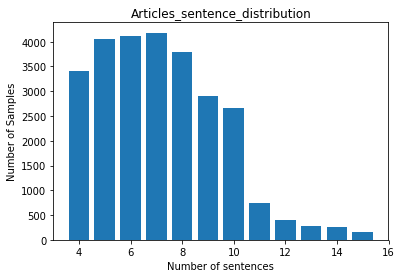

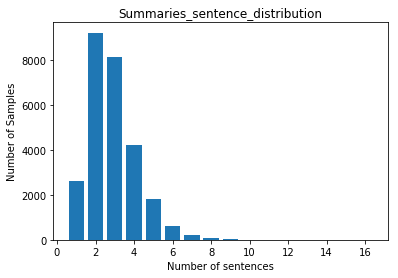

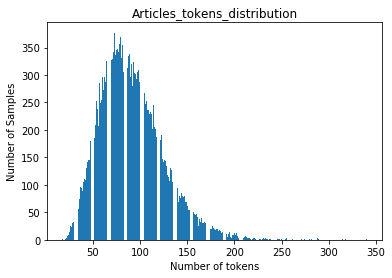

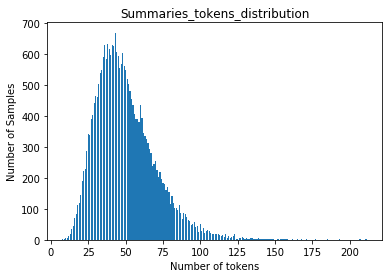

In [18]:
############################# ploting individual statistics ######################

# if using a Jupyter notebook, include:
%matplotlib inline

### Article sentences wise
x_values = list(articles_sents_freq.keys())
y_values = list(articles_sents_freq.values())

plt.bar(x_values,y_values,align='center',width = 0.80) # A bar chart
plt.xlabel('Number of sentences')
plt.ylabel('Number of Samples')
plt.title("Articles_sentence_distribution")
plt.savefig("articles_sentence_distribution.png")
plt.show()

##Summaries Sentences wise:
x_values = list(summaries_sents_freq.keys())
y_values = list(summaries_sents_freq.values())

plt.bar(x_values,y_values,align='center') # A bar chart
plt.xlabel('Number of sentences')
plt.ylabel('Number of Samples')
plt.title("Summaries_sentence_distribution")
plt.savefig("summaries_sentence_distribution.png")
plt.show()


### Article tokens wise
x_values = list(articles_tokens_freq.keys())
y_values = list(articles_tokens_freq.values())

plt.bar(x_values,y_values,align='center',width = 0.80) # A bar chart
plt.xlabel('Number of tokens')
plt.ylabel('Number of Samples')
plt.title("Articles_tokens_distribution")
plt.savefig("articles_tokens_distribution.png")
plt.show()

##Summaries tokens wise:
x_values = list(summaries_tokens_freq.keys())
y_values = list(summaries_tokens_freq.values())

plt.bar(x_values,y_values,align='center') # A bar chart
plt.xlabel('Number of tokens')
plt.ylabel('Number of Samples')
plt.title("Summaries_tokens_distribution")
plt.savefig("summaries_tokens_distribution.png")
plt.show()





In [19]:
### plotting:
%matplotlib notebook

def ploting_histograms(y_values, plot_name, method_num="method_"):
    x = [ 10 , 20,  30,  40,  50,  60,  70,  80,  90, 100]
    N = len(x)
    y = y_values #[1, 4, 27, 175, 400, 562, 593, 361, 172, 34]
    ind = np.arange(N)
    #Creating a figure with some fig size
    plt.bar(x,y,width=5)
    for index,data in enumerate(y):
        plt.text(x=x[index]-2 , y =y[index]+0.5 , s=f"{data}" , fontdict=dict(fontsize=10))
    # Add title and axis names
    plt.title(plot_name)
    plt.xlabel('percentage')
    plt.ylabel('Num of Samples')
    #saveas(plt,plot_name)
    plt.savefig(method_num+"_"+plot_name+".png")
    plt.show()

    

def plotting_all_graph_together(y1, y2, y3, y4, y5, legend_name,plot_name,method_num="method_"):
    X = percentage_ranges
    plt.plot(X, y1, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='cyan', markersize=7) 
    plt.plot(X, y2, color='magenta', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='cyan', markersize=7) 
    plt.plot(X, y3, color='blue', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='cyan', markersize=7) 
    plt.plot(X, y4, color='yellow', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='cyan', markersize=7)
    plt.plot(X, y5, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='cyan', markersize=7)
    #plt.plot(X, y5, color='red', linewidth = 3, marker='o', markerfacecolor='cyan', markersize=7)

    plt.legend([legend_name+"1",legend_name+"2",legend_name+"3",legend_name+"4",legend_name+"L"])##Create a legend for the graph
    plt.title(plot_name)
    plt.xlabel('percentages')
    plt.ylabel('Num of Samples(count)')
    plt.savefig(method_num+"_"+plot_name+".png")
    plt.show()



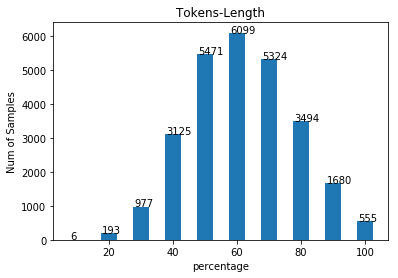

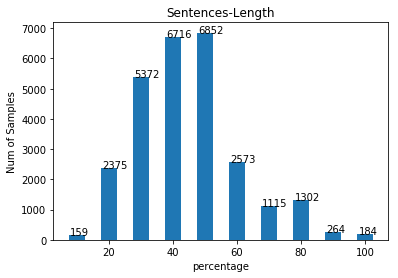

In [20]:
# if using a Jupyter notebook, include:
%matplotlib inline

#### Length:
method_name = "method4_"
ploting_histograms(length_tokens_wise_percentage, "Tokens-Length",method_name)
ploting_histograms(length_sents_wise_percentage, "Sentences-Length",method_name)


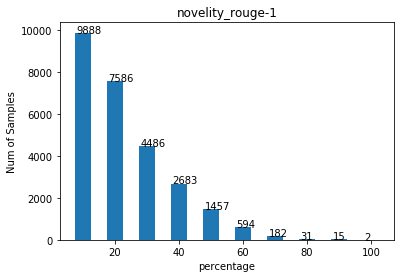

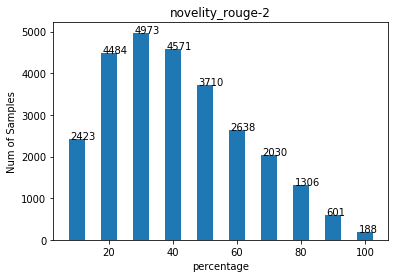

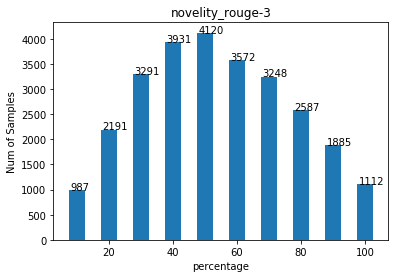

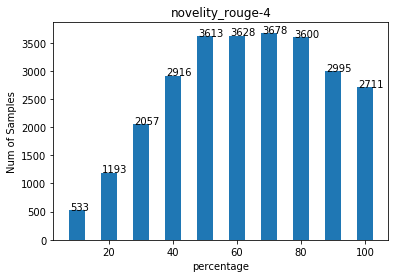

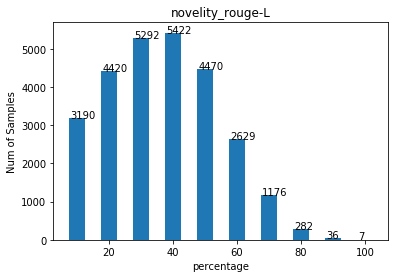

In [21]:
## Novelty:
ploting_histograms(novelity1,"novelity_rouge-1","method4_")
ploting_histograms(novelity2,"novelity_rouge-2","method4_")
ploting_histograms(novelity3,"novelity_rouge-3","method4_")
ploting_histograms(novelity4,"novelity_rouge-4","method4_")
ploting_histograms(novelity5,"novelity_rouge-L","method4_")


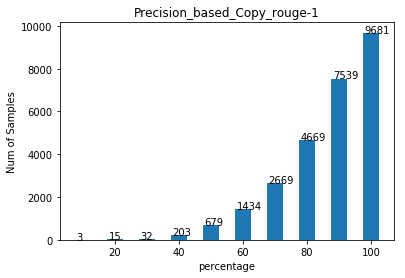

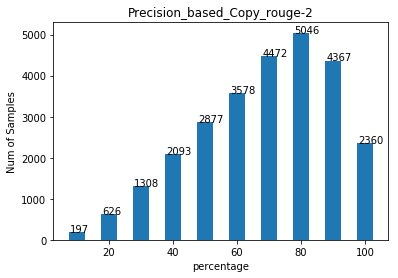

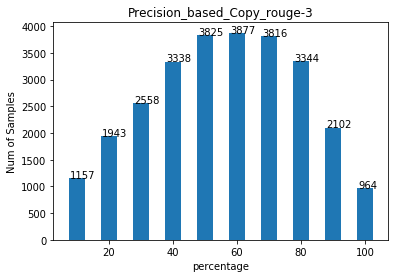

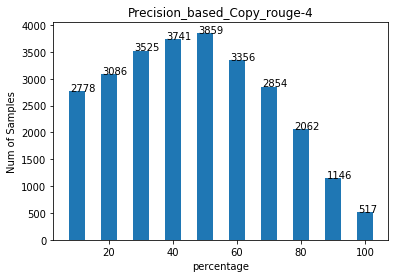

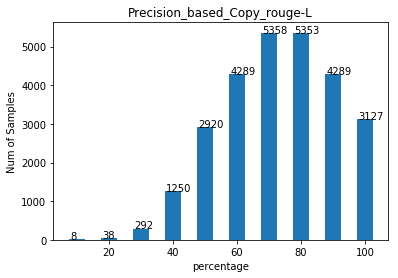

In [22]:
##Copying (Precision):
ploting_histograms(precision_copy1,"Precision_based_Copy_rouge-1","method4_")
ploting_histograms(precision_copy2,"Precision_based_Copy_rouge-2","method4_")
ploting_histograms(precision_copy3,"Precision_based_Copy_rouge-3","method4_")
ploting_histograms(precision_copy4,"Precision_based_Copy_rouge-4","method4_")
ploting_histograms(precision_copy5,"Precision_based_Copy_rouge-L","method4_")


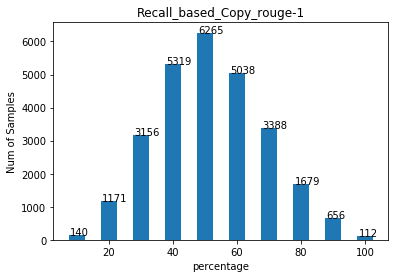

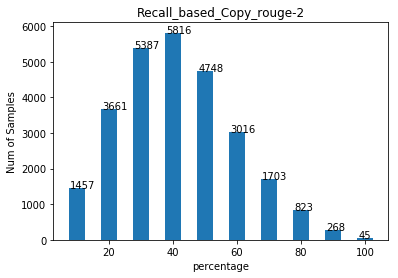

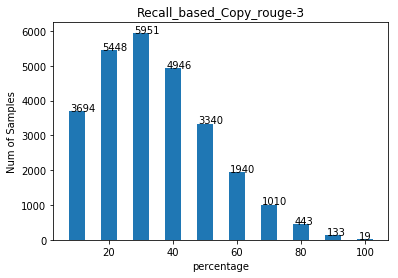

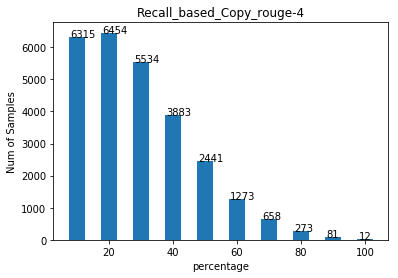

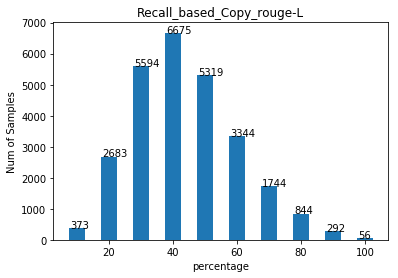

In [23]:
## Copying (Recall):

ploting_histograms(copy1,"Recall_based_Copy_rouge-1","method4_")
ploting_histograms(copy2,"Recall_based_Copy_rouge-2","method4_")
ploting_histograms(copy3,"Recall_based_Copy_rouge-3","method4_")
ploting_histograms(copy4,"Recall_based_Copy_rouge-4","method4_")
ploting_histograms(copy5,"Recall_based_Copy_rouge-L","method4_")


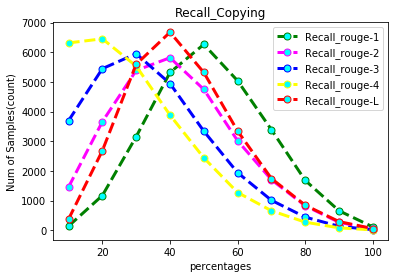

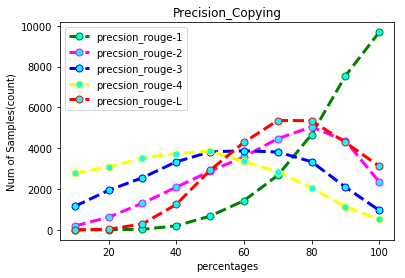

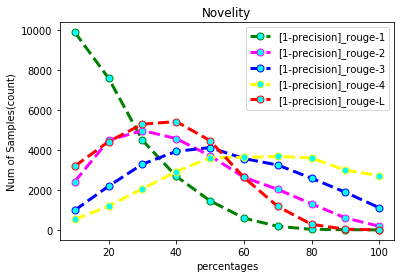

In [24]:
### all in one graph
plotting_all_graph_together(copy1,copy2,copy3,copy4,copy5,"Recall_rouge-","Recall_Copying","method_4")
plotting_all_graph_together(precision_copy1,precision_copy2,precision_copy3,precision_copy4,precision_copy5,"precsion_rouge-","Precision_Copying","method_4")
plotting_all_graph_together(novelity1,novelity2,novelity3,novelity4,novelity5,"[1-precision]_rouge-","Novelity","method_4")


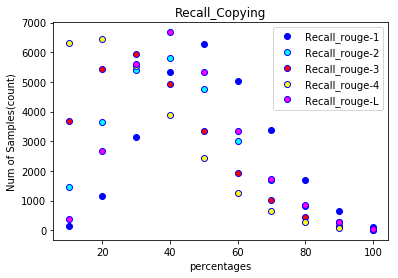

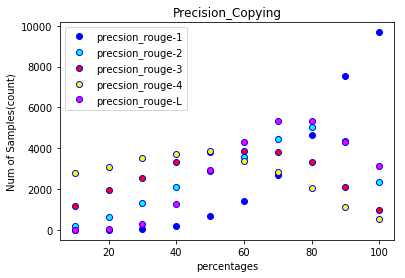

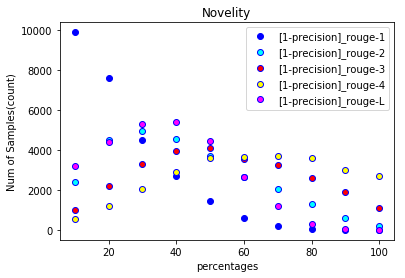

In [25]:

########## scatter plotting: ploting with the points ###########

def plotting_all_graph_together(y1, y2, y3, y4, y5, legend_name,plot_name,method_num="method_"):
    X = percentage_ranges
    plt.plot(X, y1,'bo',markerfacecolor='blue')
    plt.plot(X, y2,'bo',markerfacecolor='cyan')
    plt.plot(X, y3,'bo',markerfacecolor='red')
    plt.plot(X, y4,'bo',markerfacecolor='yellow')
    plt.plot(X, y5,'bo',markerfacecolor='magenta')
    plt.legend([legend_name+"1",legend_name+"2",legend_name+"3",legend_name+"4",legend_name+"L"])##Create a legend for the graph
    plt.title(plot_name)
    plt.xlabel('percentages')
    plt.ylabel('Num of Samples(count)')
    plt.savefig(method_num+"____"+plot_name+".png")
    plt.show()


    
### all in one graph
plotting_all_graph_together(copy1,copy2,copy3,copy4,copy5,"Recall_rouge-","Recall_Copying","method_4")
plotting_all_graph_together(precision_copy1,precision_copy2,precision_copy3,precision_copy4,precision_copy5,"precsion_rouge-","Precision_Copying","method_4")
plotting_all_graph_together(novelity1,novelity2,novelity3,novelity4,novelity5,"[1-precision]_rouge-","Novelity","method_4")


In [26]:
################################### Completed #################################

In [27]:
# Experimenting with saved Json files:

In [28]:
# #### Loading json files:


import json

f = open('rouge_scores.json',) 
samples_ngrams_scores = json.load(f) 


f2 = open("dataset.json",) 
dataset = json.load(f2) 



In [29]:


print("Corpus: Samples count = %d "%len(dataset.keys()))
print("-------------------------------------------\n")
filter_samples = [sample for sample in dataset.keys() if( len(dataset[sample]['article']['sentences_wise'])>=3   )]
print("articles sentences>=3, samples counts  = %d "%len(filter_samples))

filter_samples = [sample for sample in dataset.keys() if( len(dataset[sample]['summary']['sentences_wise'])>=3   )]
print("summaries sentences>=3, samples counts  = %d "%len(filter_samples))
print("-------------------------------------------\n")


filter_samples = [sample for sample in dataset.keys() if(((len(dataset[sample]['summary']['sentences_wise']))/float(len(dataset[sample]['article']['sentences_wise'])) )*100)<=50]
print("Sentence_CR <=50, samples counts  = %d "%len(filter_samples))
print("==============================================\n\n")

filter_samples = [sample for sample in dataset.keys() if(((len(dataset[sample]['summary']['tokens_wise']))/float(len(dataset[sample]['article']['tokens_wise'])) )*100)<=50]
print("Tokens_CR <=50, samples counts  = %d "%len(filter_samples))
print("-------------------------------------------\n")

filter_samples = [sample for sample in dataset.keys() if(((len(dataset[sample]['summary']['tokens_wise']))/float(len(dataset[sample]['article']['tokens_wise'])) )*100)<=60]
print("Tokens_CR <=60, samples counts  = %d "%len(filter_samples))
print("-------------------------------------------\n")






Corpus: Samples count = 26924 
-------------------------------------------

articles sentences>=3, samples counts  = 26924 
summaries sentences>=3, samples counts  = 15096 
-------------------------------------------

Sentence_CR <=50, samples counts  = 21474 


Tokens_CR <=50, samples counts  = 9772 
-------------------------------------------

Tokens_CR <=60, samples counts  = 15871 
-------------------------------------------



In [30]:


print("samples count = %d "%len(dataset.keys()))
list_samples = list(samples_ngrams_scores.keys())

#scores: samples_ngrams_scores
#dataset: dataset


print("\nSummaries Length in terms of sentences: ")
trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 
print("trigrams novelty greater than 25 percentages samples count = %d"%len(trigrams))

trigrams = [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) and(len(dataset[sample]['summary']['sentences_wise'])>=3) )] 
print("summary sentences len >=3 and trigrams novelty >=25 percentages samples count = %d"%len(trigrams))
print("\n---------------------------------------------------------\n")    


print("\nCompression Ratio(CR) in terms of Sentences:\n")
trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 
print("trigrams novelty greater than 25 percentages samples count = %d"%len(trigrams))

trigrams = [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) and( (len(dataset[sample]['summary']['sentences_wise'])/float(len(dataset[sample]['article']['sentences_wise'])) )*100  )<=50 )] 
print("sentences_CR <=50 and trigrams novelty >=25 percentages samples count = %d"%len(trigrams))
print("\n---------------------------------------------------------\n")    


print("Compression Ratio(CR) in terms of Tokens:\n")
trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 
print("trigrams novelty greater than 25 percentages samples count = %d"%len(trigrams))

trigrams = [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) and( (len(dataset[sample]['summary']['tokens_wise'])/float(len(dataset[sample]['article']['tokens_wise'])) )*100  )<=50 )] 
print("tokens_CR <=50 and trigrams novelty >=25 percentages samples count = %d"%len(trigrams))
#print("\n---------------------------------------\n")    

trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 
#print("trigrams novelty greater than 25 percentages samples count = %d"%len(trigrams))

trigrams = [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) and( (len(dataset[sample]['summary']['tokens_wise'])/float(len(dataset[sample]['article']['tokens_wise'])) )*100  )<=60 )] 
print("tokens_CR <=60 and trigrams novelty >=25 percentages samples count = %d"%len(trigrams))
#print("\n---------------------------------------\n")    


trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 
#print("trigrams novelty greater than 25 percentages samples count = %d"%len(trigrams))

trigrams = [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) and( (len(dataset[sample]['summary']['tokens_wise'])/float(len(dataset[sample]['article']['tokens_wise'])) )*100  )<=70 )] 
print("tokens_CR <=70 and trigrams novelty >=25 percentages samples count = %d"%len(trigrams))
print("\n==========================================================================================\n")    



print("\nSummaries Length in terms of sentences: ")
bigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) ] 
print("bigrams novelty greater than 25 percentages samples count = %d"%len(bigrams))
bigrams = [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) and(len(dataset[sample]['summary']['sentences_wise'])>=3) )] 
print("summary sentences len >=3 and bigrams novelty >=25 percentages samples count = %d"%len(bigrams))
print("\n--------------------------------------------------------\n")    


print("\nCompression Ration(CR) in terms of Sentence:\n")
bigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) ] 
print("bigrams novelty greater than 25 percentages samples count = %d"%len(bigrams))

bigrams =  [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) and( (len(dataset[sample]['summary']['sentences_wise'])/float(len(dataset[sample]['article']['sentences_wise'])) )*100  )<=50 )] 
print("sentences_CR <=50 and bigrams novelty >=25 percentages samples count = %d"%len(bigrams))
print("\n-------------------------------------------------------\n")

print("Compression Ration(CR) in terms of Tokens:\n")
bigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) ] 
print("bigrams novelty greater than 25 percentages samples count = %d"%len(bigrams))

bigrams =  [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) and( (len(dataset[sample]['summary']['tokens_wise'])/float(len(dataset[sample]['article']['tokens_wise'])) )*100  )<=50 )] 
print("tokens_CR <=50 and bigrams novelty >=25 percentages samples count = %d"%len(bigrams))
#print("\n---------------------------------------\n")    
bigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) ] 
#print("bigrams novelty greater than 25 percentages samples count = %d"%len(bigrams))

bigrams =  [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) and( (len(dataset[sample]['summary']['tokens_wise'])/float(len(dataset[sample]['article']['tokens_wise'])) )*100  )<=60 )] 
print("tokens_CR <=60 and bigrams novelty >=25 percentages samples count = %d"%len(bigrams))
#print("\n---------------------------------------\n")    

bigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) ] 
#print("bigrams novelty greater than 25 percentages samples count = %d"%len(bigrams))

bigrams =  [ sample for sample in list_samples if( (samples_ngrams_scores[sample]['novelty']['rouge-2']>=25) and( (len(dataset[sample]['summary']['tokens_wise'])/float(len(dataset[sample]['article']['tokens_wise'])) )*100  )<=70 )] 
print("tokens_CR <=70 and bigrams novelty >=25 percentages samples count = %d"%len(bigrams))
print("\n---------------------------------------\n")    


samples count = 26924 

Summaries Length in terms of sentences: 
trigrams novelty greater than 25 percentages samples count = 22303
summary sentences len >=3 and trigrams novelty >=25 percentages samples count = 12167

---------------------------------------------------------


Compression Ratio(CR) in terms of Sentences:

trigrams novelty greater than 25 percentages samples count = 22303
sentences_CR <=50 and trigrams novelty >=25 percentages samples count = 18202

---------------------------------------------------------

Compression Ratio(CR) in terms of Tokens:

trigrams novelty greater than 25 percentages samples count = 22303
tokens_CR <=50 and trigrams novelty >=25 percentages samples count = 8668
tokens_CR <=60 and trigrams novelty >=25 percentages samples count = 13865
tokens_CR <=70 and trigrams novelty >=25 percentages samples count = 18166



Summaries Length in terms of sentences: 
bigrams novelty greater than 25 percentages samples count = 17724
summary sentences len >=3 

# Novelty ( N = 1,2,3,4 Averaged scores)

In [31]:
trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 

novelty_ngrams = []

import numpy as np
for i, sample in enumerate(list_samples):
    n1 = samples_ngrams_scores[sample]['novelty']['rouge-1']
    n2 = samples_ngrams_scores[sample]['novelty']['rouge-2']
    n3 = samples_ngrams_scores[sample]['novelty']['rouge-3']
    n4 = samples_ngrams_scores[sample]['novelty']['rouge-4']
    novelty_avg = np.mean([n1,n2,n3,n4])
    print("sample_num = %s,   n1 = %.2f,    n2 = %.2f,    n3 = %.2f,    n4 = %.2f,   novelty_avg = %.2f "%(sample, n1, n2, n3, n4,novelty_avg) )
    if(i==10):
        break
    
    


sample_num = 0,   n1 = 14.52,    n2 = 32.79,    n3 = 50.00,    n4 = 64.41,   novelty_avg = 40.43 
sample_num = 1,   n1 = 18.52,    n2 = 33.96,    n3 = 46.15,    n4 = 58.82,   novelty_avg = 39.36 
sample_num = 10,   n1 = 0.00,    n2 = 11.54,    n3 = 32.00,    n4 = 50.00,   novelty_avg = 23.38 
sample_num = 100,   n1 = 18.75,    n2 = 41.94,    n3 = 56.67,    n4 = 68.97,   novelty_avg = 46.58 
sample_num = 1000,   n1 = 7.32,    n2 = 25.00,    n3 = 38.46,    n4 = 50.00,   novelty_avg = 30.19 
sample_num = 10000,   n1 = 3.77,    n2 = 13.46,    n3 = 23.53,    n4 = 30.00,   novelty_avg = 17.69 
sample_num = 10002,   n1 = 37.14,    n2 = 61.76,    n3 = 78.79,    n4 = 84.38,   novelty_avg = 65.52 
sample_num = 10003,   n1 = 7.07,    n2 = 16.33,    n3 = 25.77,    n4 = 33.33,   novelty_avg = 20.63 
sample_num = 10004,   n1 = 17.39,    n2 = 39.56,    n3 = 60.00,    n4 = 71.91,   novelty_avg = 47.22 
sample_num = 10005,   n1 = 5.88,    n2 = 12.50,    n3 = 20.00,    n4 = 28.57,   novelty_avg = 16.74 

In [32]:

trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 

print("Only trigram novelty score >=25 percentage samples count = %d"% len(trigrams))

novelty_ngrams = []
print("\nN-grams = (1,2,3,4)")
import numpy as np
for i, sample in enumerate(list_samples):
    n1 = samples_ngrams_scores[sample]['novelty']['rouge-1']
    n2 = samples_ngrams_scores[sample]['novelty']['rouge-2']
    n3 = samples_ngrams_scores[sample]['novelty']['rouge-3']
    n4 = samples_ngrams_scores[sample]['novelty']['rouge-4']
    novelty_avg = np.mean([n1,n2,n3,n4])

    if(novelty_avg>=25):
        novelty_ngrams.append(sample)
    

print("novelty_avg_ngrams scores >=25 percentage samples count = %d"%len(novelty_ngrams))




Only trigram novelty score >=25 percentage samples count = 22303

N-grams = (1,2,3,4)
novelty_avg_ngrams scores >=25 percentage samples count = 20074


In [33]:
novelty_ngrams = []

trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 

print("Only trigram novelty score >=25 percentage samples count = %d"% len(trigrams))

print("\nN-grams = (1,2,3,)")
import numpy as np
for i, sample in enumerate(list_samples):
    n1 = samples_ngrams_scores[sample]['novelty']['rouge-1']
    n2 = samples_ngrams_scores[sample]['novelty']['rouge-2']
    n3 = samples_ngrams_scores[sample]['novelty']['rouge-3']
    #n4 = samples_ngrams_scores[sample]['novelty']['rouge-4']
    novelty_avg = np.mean([n1,n2,n3])

    if(novelty_avg>=25):
        novelty_ngrams.append(sample)
    

print("novelty_avg_ngrams scores >=25 percentage samples count = %d"%len(novelty_ngrams))




Only trigram novelty score >=25 percentage samples count = 22303

N-grams = (1,2,3,)
novelty_avg_ngrams scores >=25 percentage samples count = 17164


In [34]:
novelty_ngrams = []

trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 

print("Only trigram novelty score >=25 percentage samples count = %d"% len(trigrams))

print("\nN-grams = (1,2,3,4)")
import numpy as np
for i, sample in enumerate(list_samples):
    n1 = samples_ngrams_scores[sample]['novelty']['rouge-1']
    n2 = samples_ngrams_scores[sample]['novelty']['rouge-2']
    n3 = samples_ngrams_scores[sample]['novelty']['rouge-3']
    n4 = samples_ngrams_scores[sample]['novelty']['rouge-4']
    novelty_avg = np.mean([n1,n2,n3, n4])
    sample_token_cr = (len(dataset[sample]['summary']['tokens_wise'])/float(len(dataset[sample]['article']['tokens_wise'])))*100

    if(novelty_avg>=25 and sample_token_cr<=60 ):
        novelty_ngrams.append(sample)
    

print("novelty_avg_ngrams scores >=25 percentage and Token_CR <=60 samples count = %d"%len(novelty_ngrams))



Only trigram novelty score >=25 percentage samples count = 22303

N-grams = (1,2,3,4)
novelty_avg_ngrams scores >=25 percentage and Token_CR <=60 samples count = 12727


In [35]:
novelty_ngrams = []

trigrams = [ sample for sample in list_samples if(samples_ngrams_scores[sample]['novelty']['rouge-3']>=25) ] 

print("Only trigram novelty score >=25 percentage samples count = %d"% len(trigrams))

print("\nN-grams = (1,2,3,)")
import numpy as np
for i, sample in enumerate(list_samples):
    n1 = samples_ngrams_scores[sample]['novelty']['rouge-1']
    n2 = samples_ngrams_scores[sample]['novelty']['rouge-2']
    n3 = samples_ngrams_scores[sample]['novelty']['rouge-3']
    #n4 = samples_ngrams_scores[sample]['novelty']['rouge-4']
    novelty_avg = np.mean([n1,n2,n3])
    sample_token_cr = (len(dataset[sample]['summary']['tokens_wise'])/float(len(dataset[sample]['article']['tokens_wise'])))*100

    if(novelty_avg>=25 and sample_token_cr<=60 ):
        novelty_ngrams.append(sample)
    

print("novelty_avg_ngrams scores >=25 percentage and Token_CR <=60 samples count = %d"%len(novelty_ngrams))



Only trigram novelty score >=25 percentage samples count = 22303

N-grams = (1,2,3,)
novelty_avg_ngrams scores >=25 percentage and Token_CR <=60 samples count = 11136


In [36]:
########################################### completed-II ##########################################